In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Read Data

In [2]:
dataset = pd.read_csv('zomato.csv')
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Check data

In [3]:
dataset.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

# Check NULLs

In [5]:
dataset.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
dataset = dataset[dataset.cuisines.isna() == False]

In [7]:
dataset.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
dataset.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Drop attributes that are not required

In [9]:
dataset.drop(["url","phone","address","listed_in(city)"], axis = 1, inplace=True)

In [10]:
dataset.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

### Rename columns

In [11]:
dataset.rename(columns ={'approx_cost(for two people)': 'avg_cost'}, inplace=True)
dataset.rename(columns ={'listed_in(type)': 'listed_type'}, inplace=True)

# Exploratory Data Analysis

## Plot Restaurant Names vs No of locations

In [12]:
dataset.name.value_counts().head()

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

Text(0.5,1,'Restaurant Names vs No of locations')

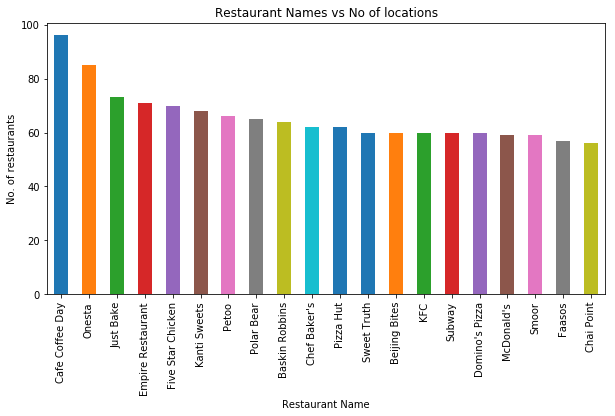

In [13]:
# Plot Restaurant Names vs No of locations
plt.figure(figsize = (10,5))
ax = dataset.name.value_counts()[:20].plot(kind = 'bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of restaurants")
plt.title('Restaurant Names vs No of locations')

## Plot Online vs Offline Orders

In [14]:
dataset.online_order.value_counts()

Yes    30428
No     21244
Name: online_order, dtype: int64

Text(0.5,1,'Online/Offline Orders Count')

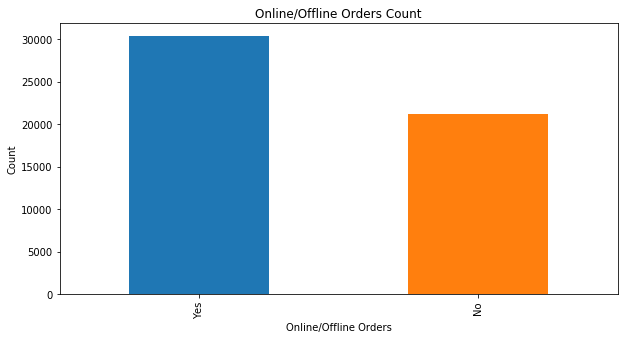

In [15]:
# Plot Online vs Offline Orders
plt.figure(figsize=(10,5))
ax = dataset.online_order.value_counts().plot(kind = 'bar')
plt.xlabel("Online/Offline Orders")
plt.ylabel("Count")
plt.title("Online/Offline Orders Count")

## Plot Book Table Facility Counts

In [16]:
dataset.book_table.value_counts()

No     45223
Yes     6449
Name: book_table, dtype: int64

Text(0.5,1,'Book Table Facility Counts')

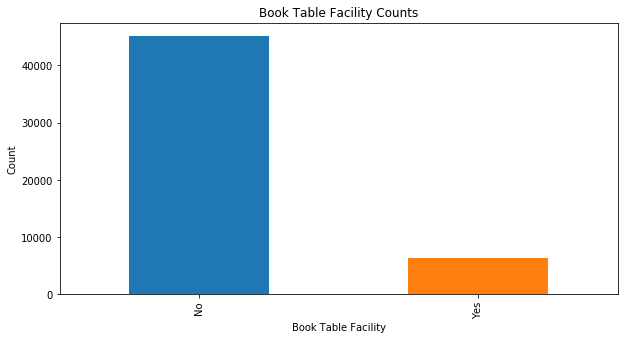

In [17]:
# Plot Book Table Facility Counts
plt.figure(figsize=(10,5))
ax = dataset.book_table.value_counts().plot(kind = 'bar')
plt.xlabel("Book Table Facility")
plt.ylabel("Count")
plt.title("Book Table Facility Counts")

## Plot location with highest no of restaurants

In [18]:
dataset.location.value_counts().head()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Name: location, dtype: int64

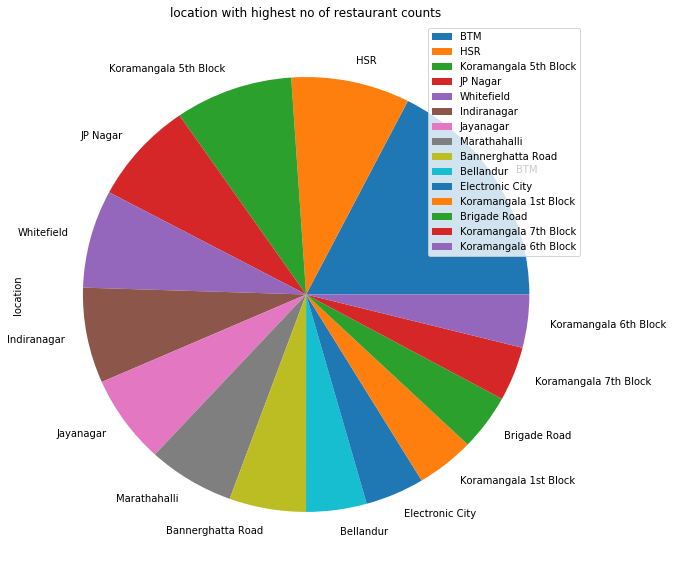

In [19]:
# Plot location with highest no of restaurants
plt.figure(figsize=(10,10))
ax = dataset.location.value_counts()[:15].plot(kind = 'pie')
plt.title("location with highest no of restaurant counts")
plt.legend()

## Plot location with highest no of restaurant percentage

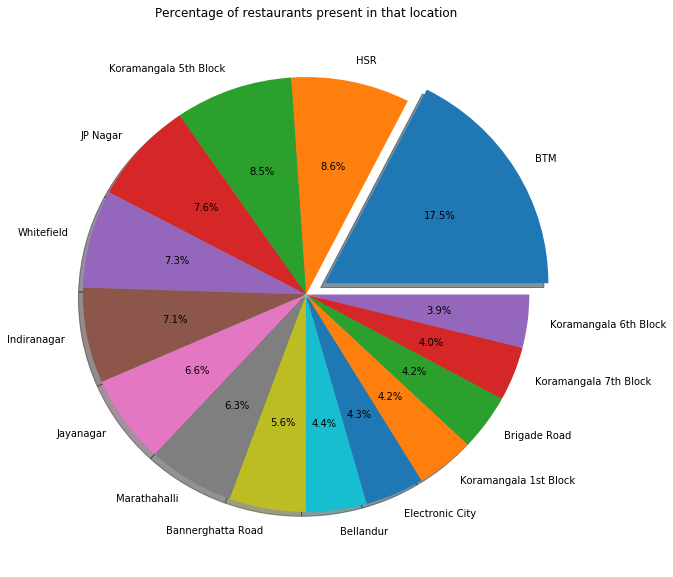

In [20]:
plt.figure(figsize=(10,10))
names = dataset.location.value_counts()[:15].index
values = dataset.location.value_counts()[:15].values
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(values, explode=explode, autopct='%0.1f%%', shadow=True, labels = names)
plt.title("Percentage of restaurants present in that location")
plt.show()

## Plot highest no of restaurant types in percentage

In [21]:
dataset.rest_type.value_counts().head()

Quick Bites       19129
Casual Dining     10326
Cafe               3732
Delivery           2595
Dessert Parlor     2262
Name: rest_type, dtype: int64

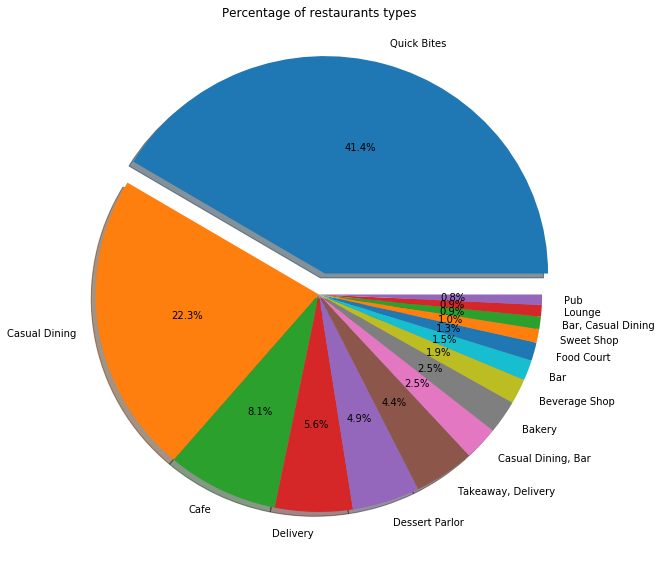

In [22]:
# Plot highest no of restaurant types
plt.figure(figsize=(10,10))
names = dataset.rest_type.value_counts()[:15].index
values = dataset.rest_type.value_counts()[:15].values
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(values, explode=explode, autopct='%0.1f%%', shadow=True, labels = names)
plt.title("Percentage of restaurants types")
plt.show()

## Plot Restaurent type vs Rate

In [23]:
dataset.rate.value_counts().head()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
Name: rate, dtype: int64

In [24]:
dataset = dataset[dataset.rest_type.isna()==False]
dataset = dataset[dataset.rate.isna()==False]
dataset = dataset[dataset.rate != 'NEW']
dataset = dataset[dataset.rate != '-']
dataset['rate'] = dataset['rate'].apply(lambda r: r.replace('/5', ''))
dataset['rate'] = dataset['rate'].apply(lambda r: float(r))
dataset.rate.value_counts().head()

3.9    3969
3.8    3867
3.7    3817
3.6    3289
4.0    3176
Name: rate, dtype: int64

/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


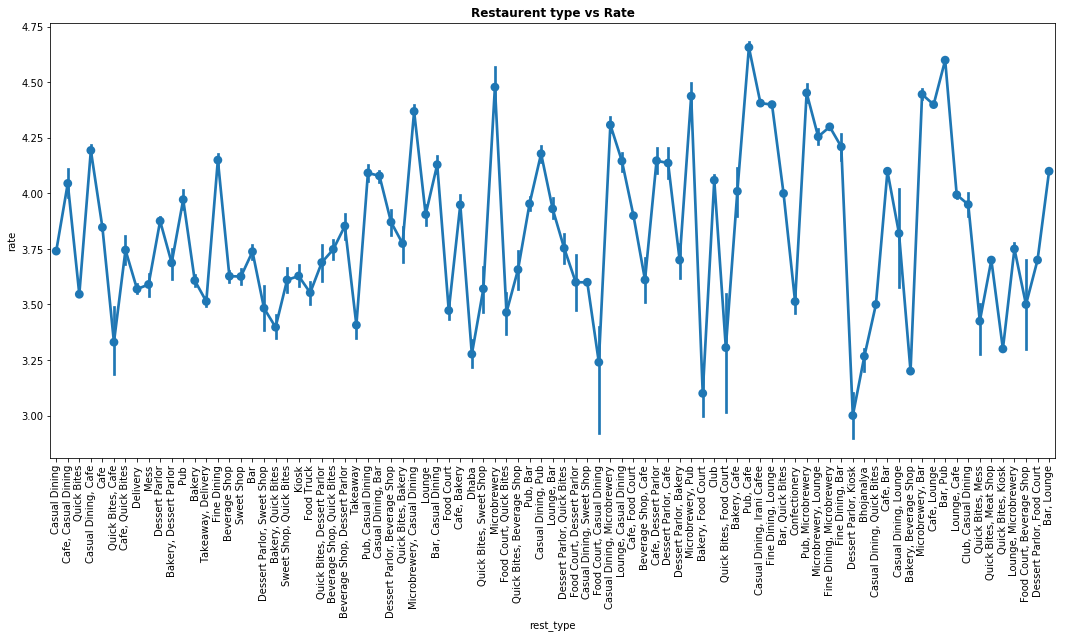

In [25]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=dataset["rest_type"], y=dataset["rate"], data=dataset)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

## Plot avg cost for 2 persons in percentage 

In [26]:
dataset.avg_cost.value_counts().head()

400    5265
300    5250
500    4081
600    3189
200    3164
Name: avg_cost, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe3c61ba048>,
 [Text(1.06836,0.546459,'400'),
  Text(0.168448,1.08703,'300'),
  Text(-0.695252,0.852423,'500'),
  Text(-1.07008,0.254792,'600'),
  Text(-1.03822,-0.363467,'200'),
  Text(-0.757157,-0.797944,'250'),
  Text(-0.409793,-1.02082,'800'),
  Text(-0.0349625,-1.09944,'700'),
  Text(0.290771,-1.06087,'1,000'),
  Text(0.551226,-0.951919,'350'),
  Text(0.760304,-0.794946,'150'),
  Text(0.919716,-0.603426,'450'),
  Text(1.02012,-0.411534,'1,200'),
  Text(1.0747,-0.234568,'1,500'),
  Text(1.09755,-0.0733397,'650')],
 [Text(0.623207,0.318768,'15%'),
  Text(0.0918805,0.592923,'15%'),
  Text(-0.379229,0.464958,'12%'),
  Text(-0.583683,0.138977,'9%'),
  Text(-0.566299,-0.198255,'9%'),
  Text(-0.412995,-0.435242,'6%'),
  Text(-0.223523,-0.55681,'6%'),
  Text(-0.0190705,-0.599697,'5%'),
  Text(0.158602,-0.578658,'4%'),
  Text(0.300669,-0.519229,'4%'),
  Text(0.414711,-0.433607,'4%'),
  Text(0.501663,-0.329142,'4%'),
  Text(0.556428,-0.224473,'3%'),
  Text(

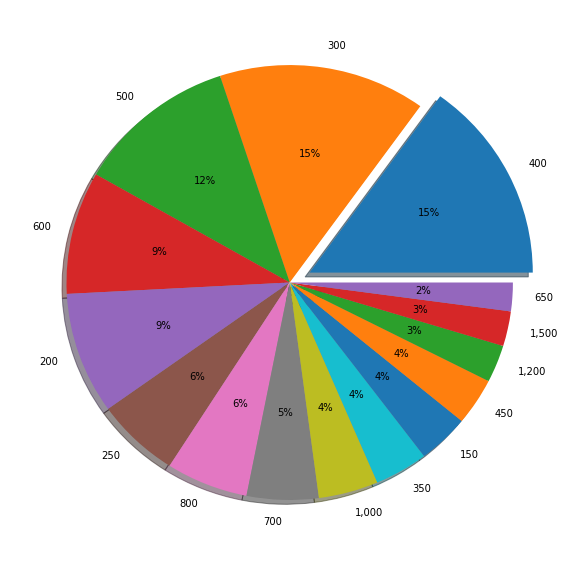

In [27]:
plt.figure(figsize=(10,10))
name = dataset.avg_cost.value_counts()[:15].index
values = dataset.avg_cost.value_counts()[:15].values
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(values, explode=explode, labels=name, autopct='%01.f%%', shadow=True)

## Plot most liked dish-type

In [28]:
dataset.dish_liked.value_counts().head(20)

Biryani                                                                               180
Friendly Staff                                                                         68
Waffles                                                                                67
Chicken Biryani                                                                        66
Paratha                                                                                56
Masala Dosa                                                                            56
Rooftop Ambience                                                                       42
Coffee                                                                                 41
Pizza                                                                                  38
Burgers                                                                                33
Cocktails                                                                              29
Prompt Ser

In [29]:
dataset_dish_liked = dataset[dataset.dish_liked.notnull()]
dataset_dish_liked.dish_liked = dataset_dish_liked.dish_liked.apply(lambda x:x.lower().strip())

liked_dish_count=[]
for dishes in dataset_dish_liked.dish_liked:
    for dish in dishes.split(','):
        liked_dish_count.append(dish.strip())
        
pd.Series(liked_dish_count).value_counts().head()

/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


pasta        3378
burgers      3015
cocktails    2796
pizza        2700
biryani      2071
dtype: int64

Text(0.5,1,'Most liked Dishes Count')

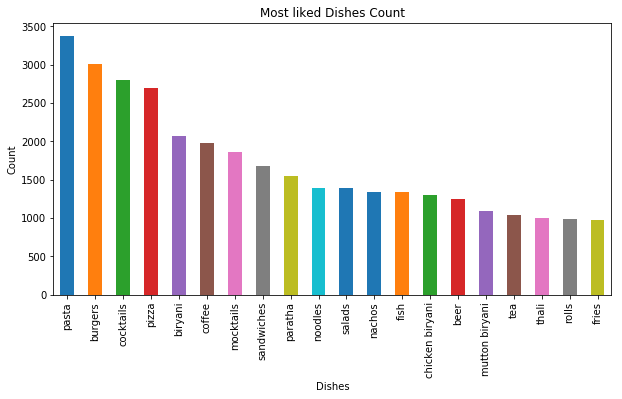

In [30]:
plt.figure(figsize=(10,5))
ax = pd.Series(liked_dish_count).value_counts()[:20].plot(kind = 'bar')
plt.xlabel("Dishes")
plt.ylabel("Count")
plt.title("Most liked Dishes Count")

# Get Correlation between different variables

In [31]:
#Encode the input Variables
def Encode(dataset):
    for column in dataset.columns[~dataset.columns.isin(['rate', 'votes'])]:
        dataset[column] = dataset[column].factorize()[0]
    return dataset

dataset_copy = Encode(dataset.copy())

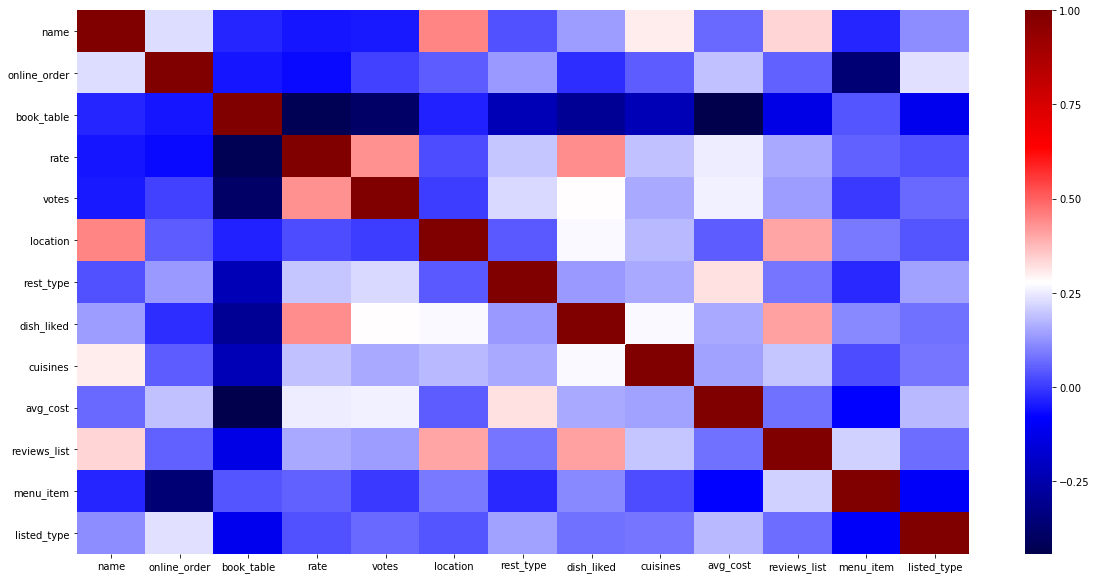

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset_copy.corr(), cmap="seismic")
plt.show()

# Create model to predict restaurant rating

### Drop columns not required

In [33]:
dataset.drop(["dish_liked","reviews_list","menu_item"], axis = 1, inplace = True)

In [34]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [35]:
dataset.isna().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
cuisines          0
avg_cost        242
listed_type       0
dtype: int64

In [36]:
dataset.shape

(41505, 10)

### Replace NaNs of column avg_cost with mean for that listed_type restaurant

In [37]:
dataset['avg_cost'] = dataset['avg_cost'].str.replace(',','')
dataset['avg_cost'] = dataset['avg_cost'].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41505 entries, 0 to 51716
Data columns (total 10 columns):
name            41505 non-null object
online_order    41505 non-null object
book_table      41505 non-null object
rate            41505 non-null float64
votes           41505 non-null int64
location        41505 non-null object
rest_type       41505 non-null object
cuisines        41505 non-null object
avg_cost        41263 non-null float64
listed_type     41505 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [38]:
dataset_not_na_avg_cost = dataset.groupby("listed_type")['avg_cost'].transform('mean')
dataset['avg_cost'].fillna(dataset_not_na_avg_cost, inplace =True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41505 entries, 0 to 51716
Data columns (total 10 columns):
name            41505 non-null object
online_order    41505 non-null object
book_table      41505 non-null object
rate            41505 non-null float64
votes           41505 non-null int64
location        41505 non-null object
rest_type       41505 non-null object
cuisines        41505 non-null object
avg_cost        41505 non-null float64
listed_type     41505 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [39]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


### Split with comma and sort values for column - rest_type and cuisines

In [40]:
dataset['rest_type'] = dataset['rest_type'].str.replace(',','')
dataset['rest_type'] = dataset['rest_type'].astype('str').apply(lambda x: ' '.join(sorted(x.split())))

In [41]:
dataset['cuisines'] = dataset['cuisines'].str.replace(',','')
dataset['cuisines'] = dataset['cuisines'].astype('str').apply(lambda x: ' '.join(sorted(x.split())))

In [42]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet


## Create dummies for columns

In [43]:
dataset['online_order'] = pd.get_dummies(dataset['online_order'])
dataset['book_table'] = pd.get_dummies(dataset['book_table'])

In [44]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type
0,Jalsa,0,0,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet
1,Spice Elephant,0,1,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet
2,San Churro Cafe,0,1,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet
3,Addhuri Udupi Bhojana,1,1,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet
4,Grand Village,1,1,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet


In [45]:
dataset_location = pd.get_dummies(dataset['location'])
dataset_rest_type = pd.get_dummies(dataset['rest_type'])
dataset_cuisines = pd.get_dummies(dataset['cuisines'])
dataset_listedin_type = pd.get_dummies(dataset['listed_type'])

In [46]:
dataset_final = pd.concat([dataset, dataset_cuisines, dataset_location, dataset_listedin_type, dataset_rest_type], axis=1)

In [47]:
dataset_final.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost,listed_type,...,Food Truck,Kiosk,Lounge,Lounge Microbrewery,Mess,Microbrewery,Microbrewery Pub,Pub,Shop Sweet,Takeaway
0,Jalsa,0,0,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,0,1,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,0,1,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,1,1,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300.0,Buffet,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,1,1,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600.0,Buffet,...,0,0,0,0,0,0,0,0,0,0


### Drop actual columns we have created dummies for

In [48]:
dataset_final.drop(["location","rest_type","cuisines","listed_type"], axis = 1, inplace=True)

In [49]:
dataset_final.head()

,name,online_order,book_table,rate,votes,avg_cost,Afghan Arabian,Afghan Biryani Indian Mughlai North,Afghan Chinese Fast Food Gujarati Indian North Rajasthani,Afghan Indian Lucknowi North,...,Food Truck,Kiosk,Lounge,Lounge Microbrewery,Mess,Microbrewery,Microbrewery Pub,Pub,Shop Sweet,Takeaway
0,Jalsa,0,0,4.1,775,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,0,1,4.1,787,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,0,1,3.8,918,800.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,1,1,3.7,88,300.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,1,1,3.8,166,600.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = dataset_final.drop(['name','rate'], axis = 1)
y = dataset_final['rate'].values

## Create train and test data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

## Train and test data with Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
from sklearn.metrics import r2_score
y_pred = linear_regression.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

-51695256414952.57


## Train and test data with Ridge Regression

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.53967540391751


## Train and test data with Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
y_pred = lasso.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.2525500087676681


## Train and test data with Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0, n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
y_pred = random_forest.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.9242526360183443


## Train and test data with Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
y_pred = decision_tree.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.8950537071251325


## Train and test data with SVM

In [62]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred = svr.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.5041135459376196


## Train and test data with KNN

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 2}

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [66]:
y_pred = knn.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.8099926593361104


## Train and test data with ExtraTreesRegressor

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
etree=ExtraTreesRegressor(n_estimators = 100)
etree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [68]:
y_pred = etree.predict(X_test)
print(r2_score(y_test, y_pred, multioutput='uniform_average'))

0.9426556436127421


## Actual vs Predcted Test Data for ExtraTreesRegressor

In [69]:
etree_df = pd.DataFrame(y_test, columns=['Actual'])
etree_df['Predicted'] = etree.predict(X_test)
etree_df.corr()

,Actual,Predicted
Actual,1.000000,0.970915
Predicted,0.970915,1.000000


In [70]:
etree_df.head(40)

,Actual,Predicted
0,3.9,3.45200
1,3.4,3.32300
2,4.1,4.10000
3,3.8,3.95700
4,3.7,3.70000
5,3.8,3.79900
6,4.2,4.20000
7,3.0,3.00000
8,4.0,4.00000
9,3.9,3.90000


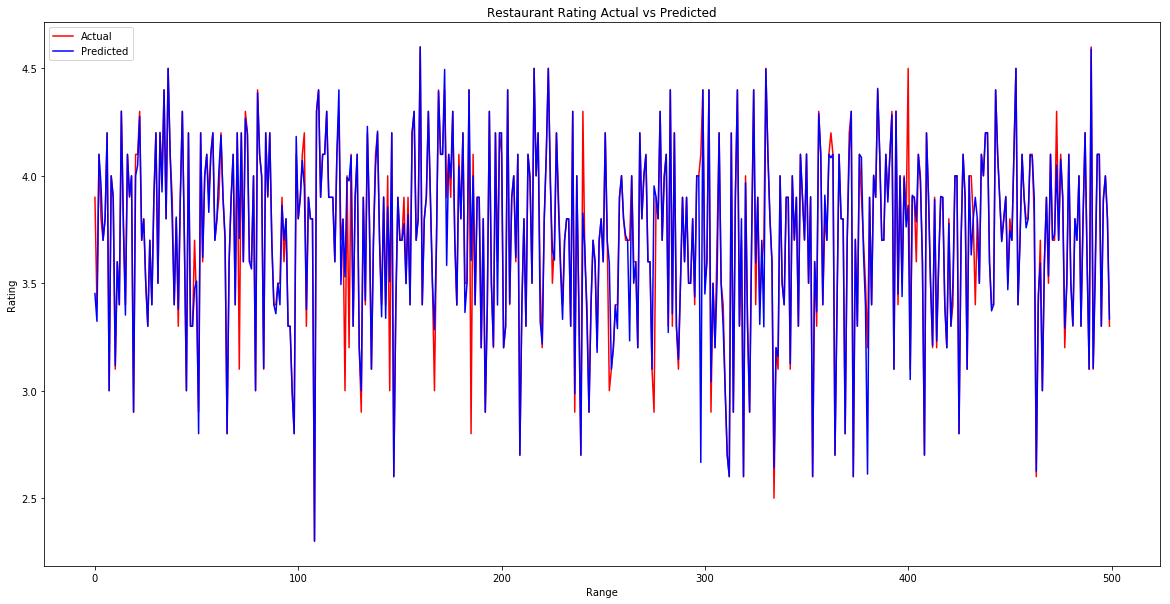

In [71]:
plt.figure(figsize=(20,10))
plt.plot(range(len(etree_df['Actual'].head(500))), etree_df['Actual'].head(500), color = "red")
plt.plot(range(len(etree_df['Predicted'].head(500))), etree_df['Predicted'].head(500), color = "blue")
plt.xlabel("Range")
plt.ylabel("Rating")
plt.title("Restaurant Rating Actual vs Predicted")
plt.legend()

## Get most important features and their contribution in model

In [72]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = etree.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
2,votes,0.252169
1,book_table,0.174055
3,avg_cost,0.040901
1823,Bites Quick,0.016351
0,online_order,0.015065
1260,Chinese Indian North,0.014900
1834,Casual Dining,0.014539
1741,Koramangala 5th Block,0.011410
1846,Dessert Parlor,0.010363
1617,Indian North,0.009606


Text(0.5,1,'Plot Feature Importances')

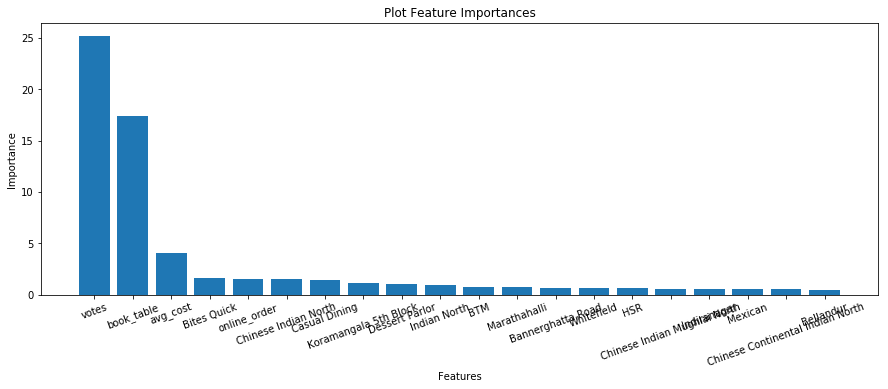

In [73]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")